In [55]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump, load

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [58]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [59]:
X= df.iloc[:,:-1]
X.shape

(303, 13)

In [60]:
y = df['target']
y.shape

(303,)

### NN Architechture

In [61]:
model = tf.keras.models.Sequential()
norm = tf.keras.layers.Normalization()
norm.adapt(X)
model.add(norm)
model.add(tf.keras.layers.Dense(units=6,activation='relu',input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=6,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'],
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 13)               27        
 tion)                                                           
                                                                 
 dense_30 (Dense)            (None, 6)                 84        
                                                                 
 dense_31 (Dense)            (None, 6)                 42        
                                                                 
 dense_32 (Dense)            (None, 1)                 7         
                                                                 
Total params: 160
Trainable params: 133
Non-trainable params: 27
_________________________________________________________________


In [62]:
featSelector = SelectKBest(chi2, k=5)

In [63]:
X = df.iloc[:,:-1]  
y = df['target']
print(X.shape,y.shape)

(303, 13) (303,)


In [69]:
featSelector.fit(X,y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000266B5E0F1F0>)

In [71]:
np.set_printoptions(precision=2)

In [73]:
features = featSelector.transform(X)
print(features.shape)

(303, 5)


In [74]:
history = model.fit(x=X, y=y, batch_size=8, epochs=100, callbacks=[es],validation_split=.2, verbose=True)

Epoch 1/100
31/31 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.8843 - val_loss: 0.8595 - val_accuracy: 0.6230
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.8843 - val_loss: 0.8370 - val_accuracy: 0.6557
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.8884 - val_loss: 0.8581 - val_accuracy: 0.6557
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.8884 - val_loss: 0.8407 - val_accuracy: 0.6557
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.8843 - val_loss: 0.8444 - val_accuracy: 0.6557
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8843 - val_loss: 0.8675 - val_accuracy: 0.6557
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.8884 - val_loss: 0.8428 - val_accuracy: 0.6557
Epoch 8/100
3

In [75]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch

<AxesSubplot:>

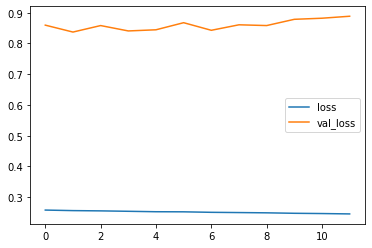

In [76]:
df[['loss','val_loss']].plot()

<AxesSubplot:>

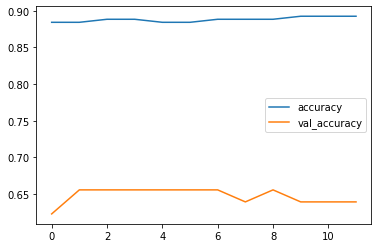

In [77]:
df[['accuracy','val_accuracy']].plot()

In [78]:
model.save('model_bekar_h')

INFO:tensorflow:Assets written to: model_bekar_h\assets
